Product Category Performance by Net Profit Scenario: The Operations Team wants to analyze the net profit for each product category to identify the most profitable categories. Requirements: • Create a bar chart that shows the total net profit (SUM(after_discount - cogs)) for each product category. • Sort the categories by the highest to lowest net profit. • Include a slicer to filter by year. Key Features to Use: • category • after_discount • cogs

📊 Net Profit by Category for 2022:
              category    net_profit
9    Mobiles & Tablets  1.498853e+09
4        Entertainment  3.286292e+08
0           Appliances  2.097472e+08
3            Computing  1.849388e+08
14       Women Fashion  6.237598e+07
8          Men Fashion  4.625274e+07
6        Home & Living  4.358258e+07
1    Beauty & Grooming  3.845714e+07
13          Superstore  2.657742e+07
5      Health & Sports  2.604143e+07
12             Soghaat  2.048218e+07
10              Others  1.569418e+07
7          Kids & Baby  1.082862e+07
11  School & Education  6.115495e+06
2                Books  3.700192e+06


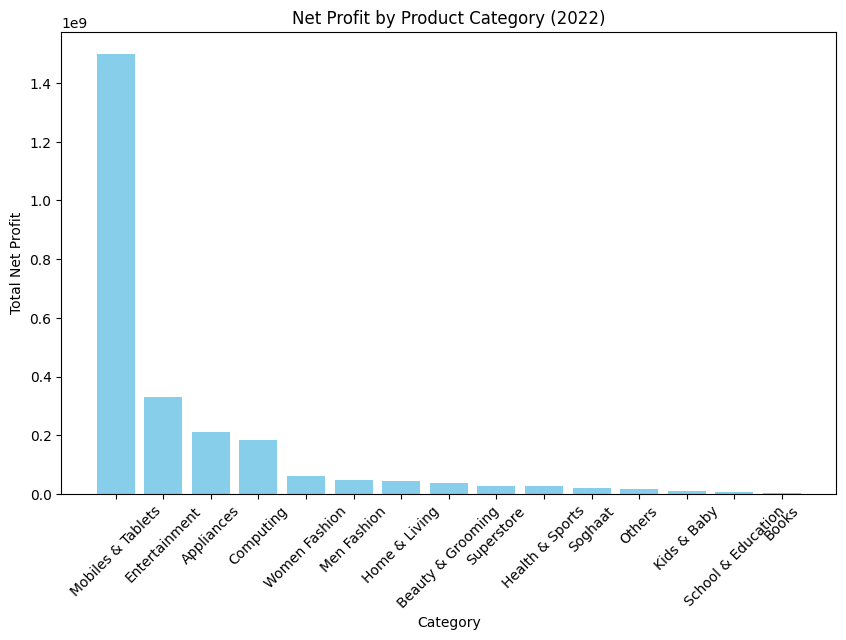

In [1]:
# 📌 Task: Product Category Performance by Net Profit

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = r"C:\Users\bhave\OneDrive\Desktop\dashboard\dataset2\finaldataset.csv"
df = pd.read_csv(file_path)

# Step 2: Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Step 3: Add Year column for filtering
df['year'] = df['order_date'].dt.year

# Step 4: Calculate net profit
df['net_profit'] = df['after_discount'] - df['cogs']

# 👉 Example: Filter by year (e.g., 2022) 
# You can change this year dynamically (acts like slicer)
year_filter = 2022
df_filtered = df[df['year'] == year_filter]

# Step 5: Aggregate net profit per category
category_profit = (
    df_filtered.groupby('category', as_index=False)['net_profit']
    .sum()
    .sort_values(by='net_profit', ascending=False)
)

print(f"📊 Net Profit by Category for {year_filter}:")
print(category_profit)

# Step 6: Visualization
plt.figure(figsize=(10, 6))
plt.bar(category_profit['category'], category_profit['net_profit'], color="skyblue")
plt.title(f"Net Profit by Product Category ({year_filter})")
plt.xlabel("Category")
plt.ylabel("Total Net Profit")
plt.xticks(rotation=45)
plt.show()
